In [2]:
import pandas as pd
import numpy as np

In [10]:
data = pd.read_csv('.gitignore/wanted_result.csv', index_col = 0)

In [11]:
data.isna().sum()

기업명                0
업종분류              30
사원수              978
설립연도               6
기업형태             845
매출액              181
주소                 0
직무                 0
자격요건              20
직급                 0
이용하는기술스택/우대사항      7
해당 페이지 URL         0
기업 홈페이지 URL       29
dtype: int64

In [12]:
data.dropna(subset='업종분류', inplace = True)

In [13]:
data

,기업명,업종분류,사원수,설립연도,기업형태,매출액,주소,직무,자격요건,직급,이용하는기술스택/우대사항,해당 페이지 URL,기업 홈페이지 URL
0,젭,데이터베이스 및 온라인정보 제공업,NaN,2021.0,NaN,NaN,서울특별시 강남구,소프트웨어 엔지니어,"프로그래밍언어,열정,성실",3,"멀티,쓰레드,분할,서버,웹,웹소켓,소켓,클라우드,구축,메타버스,AWS",https://www.wanted.co.kr/wd/180861,NaN
1,서커스컴퍼니,응용 소프트웨어 개발 및 공급업,20.0,2012.0,중소기업,170563.0,서울특별시 강남구,소프트웨어 엔지니어,"전공무관,Node,Net,Nginx,Apache,SystemDesign,MySQL,...",0,"소프트웨어,객체지향,빌드,배포,자동화,프로젝트,서버,아키텍처,버전관리,AWS,EC,...",https://www.wanted.co.kr/wd/207284,www.circuscompany.com
2,블로코,응용 소프트웨어 개발 및 공급업,29.0,2014.0,중소기업,118214.0,경기도 성남시 분당구,소프트웨어 엔지니어,"개발경력2년,대용량데이터,데이터,Golang",2,"블록,블록체인,체인,트랙트,프레임워크,개발경험,암호화,전자서명,클라우드,spring...",https://www.wanted.co.kr/wd/206690,ww.blocko.io
3,피매치,자연과학 및 공학 융합 연구개발업,NaN,2021.0,NaN,5286.0,서울특별시 성북구,소프트웨어 엔지니어,"서비스개발,데이터,딥러닝프레임워크,AI,Python,Tensorflow,Pytorch",2,"헬스,헬스케어,자연어,모델,영문,논문,분석,LLM,Linux,Docker",https://www.wanted.co.kr/wd/186806,www.pmatch.co.kr
4,만나플래닛,응용 소프트웨어 개발 및 공급업,134.0,2016.0,중소기업,1419493.0,서울특별시 구로구,소프트웨어 엔지니어,JAVA,5,"협업,프레임워크,트렌드,Rest API,API,Git,redmine",https://www.wanted.co.kr/wd/206244,www.manna-planet.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1956,무신사,전자상거래 소매업,1354.0,2012.0,중견기업,64516211.0,서울특별시 성동구,BI 엔지니어,"해당경력5년,업무능력보유,데이터,파이프,파이프라인설계,프로그래밍경험,중급,중급이상,...",5,"프로덕트,클라우드,데이터,인프라,구축,시각화,툴,프로세싱,분석,모델링,도출,Apac...",https://www.wanted.co.kr/wd/180361,www.musinsa.com
1957,인센드,응용 소프트웨어 개발 및 공급업,NaN,2023.0,NaN,NaN,경기도 성남시 분당구,BI 엔지니어,"경력8년이상,창의성,협동심,도전,도전정신",8,"리더쉽,능력,Full Stack",https://www.wanted.co.kr/wd/195532,NaN
1958,큐픽스,컴퓨터 프로그래밍 서비스업,59.0,2015.0,중소기업,280419.0,경기도 성남시 분당구,루비온레일즈 개발자,"석사,석사학위이상,학위,2년이상경력자,실력보유자,전문,전문연구요원,연구,병역,병역특...",2,"클라우드,웹,웹서비스,구축,고민해본,모니터링,탐지,해결,대규모,트래픽,글로벌,자동화...",https://www.wanted.co.kr/wd/207738,www.cupix.com
1959,엔비티,광고매체 판매업,77.0,2012.0,중소기업,10251976.0,서울특별시 서초구,루비온레일즈 개발자,"백엔드개발,운영실무6년,이해도,외부서비스,조직이제공,내부시스템,트래픽,트래픽서비스,...",6,"모바일,광고,서버,비즈니스,클라우드,AdTech,Ruby on Rails,Sprin...",https://www.wanted.co.kr/wd/177555,www.nbt.com


In [17]:
data.업종분류.value_counts().median()

4.0

In [18]:
data.업종분류.value_counts() > 4

업종분류
응용 소프트웨어 개발 및 공급업                True
시스템 소프트웨어 개발 및 공급업               True
데이터베이스 및 온라인정보 제공업               True
전자상거래 소매업                        True
포털 및 기타 인터넷 정보매개 서비스업            True
                                ...  
그 외 기타 건축자재 도매업                 False
영화, 비디오물 및 방송프로그램 제작 관련 서비스업    False
상품 종합 도매업                       False
기타 전문 서비스업                      False
검퓨터시스템 통합 자문 및 구축 서비스업          False
Name: count, Length: 125, dtype: bool

In [20]:
data['수요'] = data['업종분류'].apply(lambda x: 1 if data['업종분류'].value_counts()[x] > 4 else 0)

In [23]:
data.수요.value_counts()

수요
1    1764
0     168
Name: count, dtype: int64

In [25]:
data.isna().sum()

기업명                0
업종분류               0
사원수              961
설립연도               0
기업형태             837
매출액              162
주소                 0
직무                 0
자격요건              18
직급                 0
이용하는기술스택/우대사항      7
해당 페이지 URL         0
기업 홈페이지 URL       22
수요                 0
dtype: int64

c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  func(*args, **kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from current font.
  func(*args, **kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


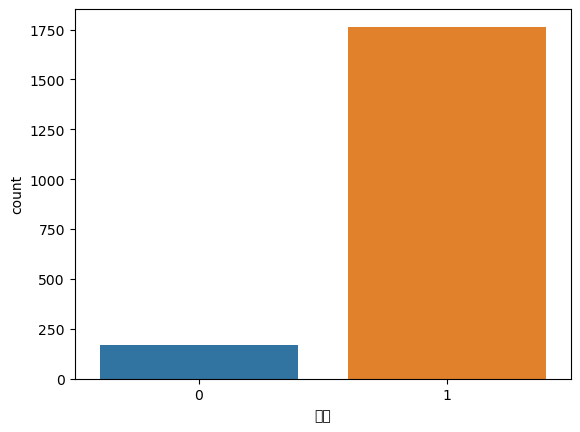

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x = data['수요']);

In [27]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, OneHotEncoder


X = data.drop(columns=(['사원수', '기업형태', '해당 페이지 URL', '기업 홈페이지 URL', '업종분류', '수요']))
y = data['수요']

original_column_names = list(X.columns)
original_column_names.insert(0, 'const')



scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X = sm.add_constant(X)  # Add constant for intercept term
logit_model = sm.Logit(y, X)
result = logit_model.fit()

summary = result.summary(xname=original_column_names)

ValueError: could not convert string to float: '젭'